<a href="https://colab.research.google.com/github/JQ100/project2/blob/main/project2part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df = pd.read_csv('/content/superstore - superstore.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
# address duplicate rows
df[df.duplicated(keep=False)]
# there are no duplicates :)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


In [ ]:
# delete unnecessary columns
df = df.drop(['Row ID', 'Ship Date', 'Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Quantity'], axis=1)
df.head()
# we only need to preserve order information, no need shipment info that only the customer will want

,Order ID,Order Date,Customer ID,Customer Name,Product ID,Category,Sub-Category,Product Name,Sales,Discount,Profit
0,CA-2016-152156,11/8/2016,CG-12520,Claire Gute,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,0.00,41.9136
1,CA-2016-152156,11/8/2016,CG-12520,Claire Gute,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,0.00,219.5820
2,CA-2016-138688,6/12/2016,DV-13045,Darrin Van Huff,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,0.00,6.8714
3,US-2015-108966,10/11/2015,SO-20335,Sean O'Donnell,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,0.45,-383.0310
4,US-2015-108966,10/11/2015,SO-20335,Sean O'Donnell,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,0.20,2.5164


In [ ]:
# address missing values
print(df.isna().sum().sum(), 'missing values')
# there are no missing values :)

0 missing values


After using value_counts() and .unique(), there are no data inconsistencies.

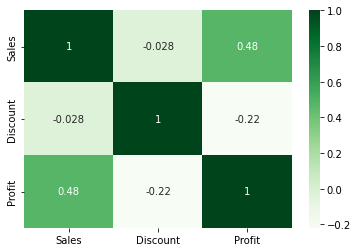

In [ ]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True)

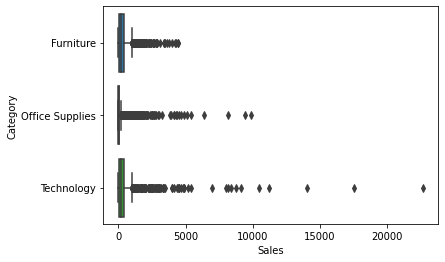

In [ ]:
sns.boxplot(x='Sales', y='Category', data=df)

In [ ]:
# identify the outliers
df.describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,229.858001,0.156203,28.656896
std,623.245101,0.206452,234.260108
min,0.444000,0.000000,-6599.978000
25%,17.280000,0.000000,1.728750
50%,54.490000,0.200000,8.666500
75%,209.940000,0.200000,29.364000
max,22638.480000,0.800000,8399.976000
